# Real World Sales Analysis

In [ ]:
#Import Libraries 

In [171]:
import os
import pandas as pd

In [ ]:
#Merging Dataframe into one

In [172]:
df = pd.read_csv(r"C:\Users\faraz\OneDrive\Desktop\New folder (3)\Sales Data\Sales_April_2019.csv")

files = [file for file in os.listdir(r"C:\Users\faraz\OneDrive\Desktop\New folder (3)\Sales Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(r"C:\Users\faraz\OneDrive\Desktop\New folder (3)\Sales Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
                     
                     
all_months_data.to_csv("all_data.csv", index= False)

In [173]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# DATA CLEAN UP

In [ ]:
#DROPPING NAN VALUES (NULLS)

In [174]:
nan_df  = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how ='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [ ]:
#Getting rid of text on date column

In [175]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [176]:
all_data ['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float

In [293]:
# Make columns correct type

In [177]:
all_data['Month'] = all_data["Order Date"].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Augumenting Data with Additional columns 

In [ ]:
#Adding a month column

In [178]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [179]:
# add a city column 

In [213]:
# using .apply()
def get_city(address):
    return address.split(',')[1]


def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
#all_data.drop("Columns", axis=1, inplace=True)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,order_date,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),2019-04-19 08:46:00,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 22:30:00,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-30 09:27:00,9,27,1


# DATA Analysis

In [ ]:
#Question: Best Month in sales? highest earning month

In [225]:
all_data.drop("Columns", axis=1, inplace=True)

In [226]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales,Hour,Minute,Count
Month,,,,,,
1,10903,1811768.38,1822256.73,139485,282440,9709
2,13449,2188884.72,2202022.42,172669,354885,11975
3,17005,2791207.83,2807100.38,218969,447559,15153
4,20558,3367671.02,3390670.24,262259,544186,18279
5,18667,3135125.13,3152606.75,238780,487899,16566
6,15253,2562025.61,2577802.26,195528,402436,13554
7,16072,2632539.56,2647775.76,206169,417349,14293
8,13448,2230345.42,2244467.88,172289,353857,11961
9,13109,2084992.09,2097560.13,168513,341698,11621


In [227]:
all_data['Columns'] = all_data['Purchase Address']

In [228]:
results = all_data.groupby('Month').sum()['Sales']

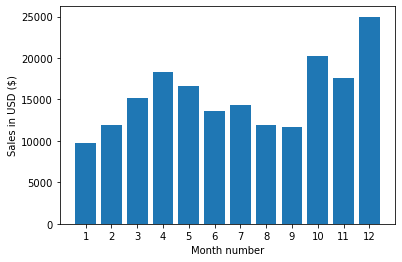

In [240]:
import matplotlib.pyplot as plt

months = range(1,13)


plt.bar(months,all_data.groupby(['Month']).sum()['Count'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


In [ ]:
# ANSWER: December sold the most, most likely due to christmas/holiday season

In [230]:
#Question: which city sold the most product?

In [231]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
City,,,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,214264,442932,14881
Austin (TX),11153,1809873.61,69829,1819581.75,141946,289060,9905
Boston (MA),22528,3637409.77,141112,3661642.01,288225,590442,19934
Dallas (TX),16730,2752627.82,104620,2767975.40,214390,435155,14820
Los Angeles (CA),33289,5421435.23,208325,5452570.80,427444,866638,29605
New York City (NY),27932,4635370.83,175741,4664317.43,357696,733598,24876
Portland (ME),2750,447189.25,17144,449758.27,35211,72856,2455
Portland (OR),11303,1860558.22,70621,1870732.34,144421,295533,10010
San Francisco (CA),50239,8211461.74,315520,8262203.91,643265,1319477,44732


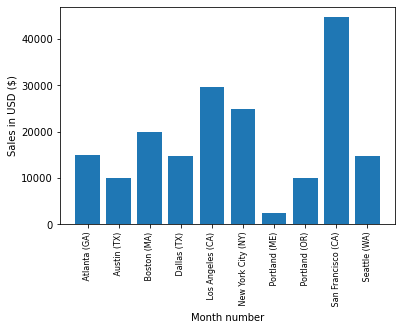

In [241]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Count'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [233]:
##Optimal Advertising timings for customer accusition 

In [234]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour


In [235]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [236]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,order_date,Hour,Minute,Count,Columns
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),2019-04-19 08:46:00,8,46,1,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 22:30:00,22,30,1,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00,14,38,1,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00,14,38,1,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-30 09:27:00,9,27,1,"333 8th St, Los Angeles, CA 90001"


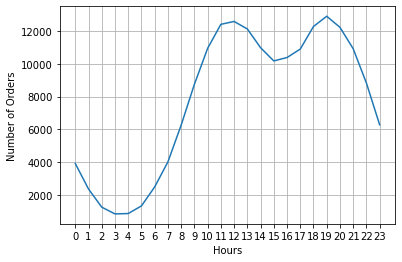

In [245]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

In [ ]:
##Answer: from 11 am till 8 pm, as most people are active users during that time

In [ ]:
##Question: Best product pairings

In [255]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(100)

C:\Users\faraz\AppData\Local\Temp\ipykernel_20980\1693540750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [262]:
from itertools import combinations
from collections import Counter
 

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [ ]:
# Answer: Best product pairing are a high ticket items such as an Iphone, along with an accessory such as Lighting Charging Cable

In [294]:
# Question: Which product sold the most, and why?

In [264]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,order_date,Hour,Minute,Count,Columns
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),2019-04-19 08:46:00,8,46,1,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),2019-04-07 22:30:00,22,30,1,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),2019-04-12 14:38:00,14,38,1,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-12 14:38:00,14,38,1,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),2019-04-30 09:27:00,9,27,1,"333 8th St, Los Angeles, CA 90001"


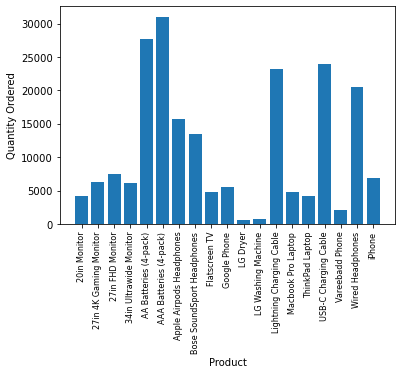

In [272]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']



products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation = 'vertical' , size= 8)

plt.show()

C:\Users\faraz\AppData\Local\Temp\ipykernel_20980\3867521137.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


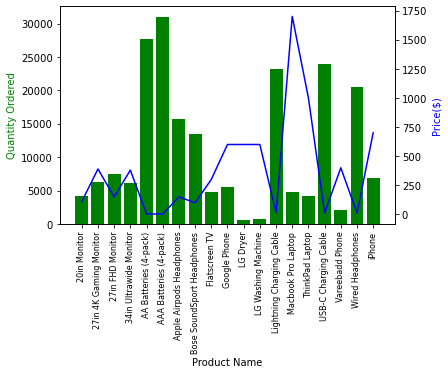

In [292]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color ='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color ='g')
ax2.set_ylabel('Price($)', color='b')


ax1.set_xticklabels(products, rotation='vertical', size=8)


plt.show()

In [ ]:
## Answer: Correlation and causation has an inverse relation ship
#as price increases the Quantity Sold decreases 